In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading in a data file

En la vida real es muy posible que los ficheros no se encuentren formateados de una forma adecuada. En el siguiente ejercicio vamos a proceder a realizar la carga de un fichero que no dispone de nombres en la cabecera.

In [2]:
#Cargamos los datos
df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.csv')

#Vemos la carga 
df.head(3)

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,


En este caso podemos ver como ha considerado la primera fila como cabecera de nuestra función, sin embargo, esto no es correcto. Para evitar esto disponemos del parámetro **header** que asignándole el valor **None** indicamos que nuestro conjunto de datos no dispone de cabecera.

In [3]:
#Cargamos los datos de forma adecuada
df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.csv', header = None)

#Vemos la carga
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,


Ahora la carga parece es más correcta, en caso de no existir cabecera, podemos ver que Pandas automáticamente asinga valores enteros desde 0 hasta el número de columnas.

# Re-assigning column names

Una vez tenemos los datos cargados de forma adecuada, el siguiente paso es limpiar estos datos para poder trabajar con estos de una forma adecuada. El primer paso consistirá en asignarle cabecera a estos datos.

In [8]:
#Cargamos la cabecera de nuestros datos
columns_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

#Hacemos uso de split para crearnos una lista con los nombres de las cabeceras
columns_labels_list = columns_labels.split(',')

#Asignamos los nombres a la cabecera
df.columns = columns_labels_list

#Vemos el resultado
df.head(3)

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,


A continuación vamos a proceder a eliminar una serie de columnas que no son serán útiles a la hora de trabajar con los datos.

In [9]:
#Nos creamos con la lista de las columnas a eliminar
columns_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag',
                'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag',
                'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag',
                'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag',
                'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange',
                'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter',
                'record_type', 'altimeterFlag', 'junk']

#Eliminamos las columnas
df = df.drop(columns_drop, axis = 1)

#Vemos el resultado 
df.head(3)

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01


# Cleaning and tidying datetime data

A continuación vamos a proceder a crearnos nuestro propio índice de series temporales.

In [16]:
#Pasamos a tipo string la columnas data
df['date'] = df.date.astype('str')

#Rellenamos con ceros a la izquierda la columna Time
df['Time'] = df.Time.apply(lambda x: '{:0>4}'.format(x))

#Concatenamos las columnas date y Time
date_string = df.date + df.Time

#Convertimos nuestra serie date_string a tipo fecha
date_times = pd.to_datetime(date_string, format = '%Y%m%d%H%M')

#Ahora cambiamos el indexado de nuestro conjunto de datos
df = df.set_index(date_times)

#Vemos el resultado
df.head(3)

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01


# Cleaning the numeric columns

Las columnas numéricas contienen valores como 'M', indicando esto que debería ser un valor perdido, a continuación vamos a proceder a cambiar estos valores por por valores perdidos. La función pd.to_numeric() de Pandas es ideal para este propósito. Esta función convierte una serie de valores a valores de tipo punto flotante. Además especificando el parámetro **errors = 'coerce'** forzaremos a que strings del estilo 'M' sean transformados a NaN.

In [18]:
#Mostramos la temperatua dry_bulb_faren entre las 8AM-9AM para el 20 de junio de 2011
df.loc['2011-06-20 08:00:00': '2011-06-20 09:00:00', 'dry_bulb_faren']

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object

Aquí podemos ver como tenemos valores con valor M, esto nos indica que se trata de un valor perdido

In [20]:
#Aplicamos pd.to_numeric
df['dry_bulb_faren'] = pd.to_numeric(df['dry_bulb_faren'], errors='coerce')

#Comprobamos el resultado
df.loc['2011-06-20 08:00:00': '2011-06-20 09:00:00', 'dry_bulb_faren']

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64

In [23]:
#Hacemos lo mismo para wind_speed y dew_point_faren
df['wind_speed'] = pd.to_numeric(df['wind_speed'], errors = 'coerce')
df['dew_point_faren'] = pd.to_numeric(df['dew_point_faren'], errors = 'coerce')

# Signal min, max, median

A continuación vamos a proceder a realizar una análisis exploratorio de nuestro conjunto de datos.

In [26]:
#Calculamos la mediana de la columna dry_bulb_faren
print(df['dry_bulb_faren'].median())

72.0


In [29]:
#Calculamos la mediana para las fechas que se encuentran entre abril y junio de 2011
print(df.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

78.0


In [30]:
#Calculamos la mediana para el mes de enero
print(df.loc['2011-01', 'dry_bulb_faren'].median())

48.0


# Signal variance

A continuación vamos a proceder a comparar los datos del año 2011 con los de los últimos 30 años.

In [48]:
#Cargamos los datos para el año 2010
df_2010 = pd.read_csv('weather_data_austin_2010.csv', parse_dates=['Date'], index_col='Date')

In [49]:
#Calculamos el promedio de temperatura por día para el año 2011
df_2011_daily = df.resample('D').mean()

#Obtenemos los valores
df_2011_daily_values = df_2011_daily['dry_bulb_faren'].values

In [50]:
#Calculamos el promedio de temperatura por día para el 2010
df_2010_daily = df_2010.resample('D').mean()

#Seleccionamos la column Temperature
df_2010_daily_temperature = df_2010_daily.reset_index()['Temperature']

In [53]:
#Vemos las diferencias
print((df_2011_daily_values - df_2010_daily_temperature).mean())

1.3301831870056482


Podemos ver como la temperatura en promedio ha aumentado un 1.3 grados Farenheit respecto a los últimos 30 años.

# Sunny or cloudy

A continuación vamos a comparar la temperatura en los días soleados y en los días nublados. 

In [55]:
#Seleccionamos los días soleados
sunny_days = df.loc[df['sky_condition'] == 'CLR']

#Seleccionamos los días nublados
cloudy_days = df.loc[df['sky_condition'].str.contains('OVC')]

In [56]:
#Calculamos el máximo diario para cada tipo de día
sunny_days_daily = sunny_days.resample('D').max()
cloudy_days_daily = cloudy_days.resample('D').max()

In [57]:
#Vemos las diferencias
print(sunny_days_daily.mean() - cloudy_days_daily.mean())

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


# Weekly average temperature and visibility

¿Existe alguna correlación entre la temperatura y la visibilidad? A continuación vamos a proceder a responder a esta pregunta.

In [81]:
#Cambiamos a tipo numérico la columna visibility
df['visibility'] = pd.to_numeric(df['visibility'], errors = 'coerce')

#Seleccionamos la temperatura y la visibilidad y le hacemos una agregación por la media de forma semanal
weekly_mean = df[['visibility', 'dry_bulb_faren']].resample('W').mean()

#Vemos si existe algún tipo de correlación
print(weekly_mean.corr())

                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


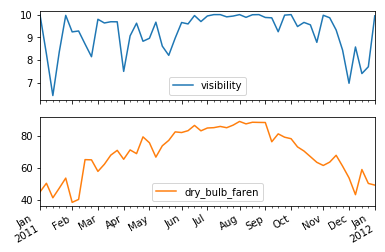

In [82]:
#Mostramos los reslutados
weekly_mean.plot(subplots=True)
plt.show()

# Daily hours of clear sky

A continuación vamos a proceder a ver mediante un boxplot, la proporción de días que son soleados.

In [85]:
#Nos creamos una serie de tipo booleana para indicar los días soleados
sunny = df['sky_condition'] == 'CLR'

#Calculamos el número de horas soleadas
sunny_hours = sunny.resample('D').sum()

#Calculamos el total de horas
total_hours = sunny.resample('D').count()

In [90]:
#Nos calculamos para cada día la fracción de horas soleadas
sunny_fraction = sunny_hours / total_hours

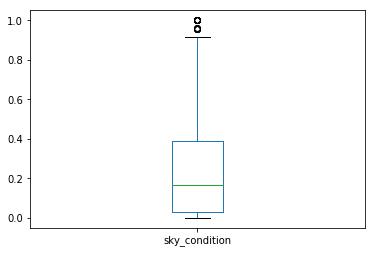

In [92]:
#Generamos nuestro boxplot
sunny_fraction.plot(kind = 'box')
plt.show()

# Heat or humidity

**Dew Point** es una medida de la humedad basada en la presión y la temperatura. Un valor por encima de 65 se considera incómodo mientras que una temperatura por encima de 90 también se considera incómoda. A continuación vamos a calcular el máximo valor de temperatura y dew point para cada uno de los meses.

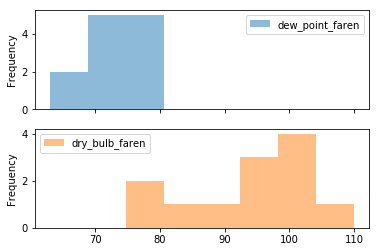

In [96]:
#Calculamos el máximo de ambas
max_values = df[['dew_point_faren','dry_bulb_faren']].resample('M').max()

#Vemos los resultados en un histograma
max_values.plot(kind = 'hist', bins = 8, alpha = 0.5, subplots = True)
plt.show()

# Probability of high temperatures

Ya sabemos que el año 2011 fue el año más caluroso de los últimos 30 años. A continuación vamos a comparar la temperatura para los meses de agosto en 2010 y 2011. Haremos uso de la CDF para determinar la probabilidad de que la temperatura diaria en el mes de agosto en 2011 sea superior a 2010. 

In [102]:
#Obtenemos la temperatura máxima de agosto en 2010
max_august_2010 = df_2010.loc['2010-08', 'Temperature'].max()
print(max_august)

95.3


In [103]:
#Calculamos para 2011 la temperatura máximo diario para el mes de agosto
max_august_2011_daily = df.loc['2011-08', 'dry_bulb_faren'].resample('D').max()
print(max_august_2011_daily)

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
2011-08-11    101.0
2011-08-12    100.0
2011-08-13     96.0
2011-08-14    101.0
2011-08-15    103.0
2011-08-16    102.0
2011-08-17    100.0
2011-08-18    104.0
2011-08-19    103.0
2011-08-20    104.0
2011-08-21    102.0
2011-08-22    103.0
2011-08-23    102.0
2011-08-24    102.0
2011-08-25     93.0
2011-08-26    101.0
2011-08-27    107.0
2011-08-28    110.0
2011-08-29    107.0
2011-08-30    103.0
2011-08-31    100.0
Freq: D, Name: dry_bulb_faren, dtype: float64


In [104]:
#Filtramos por las fechas en las que 2011 supera a 2010 
august_2011_high = max_august_2011_daily[max_august_2010_daily > max_august_2010]

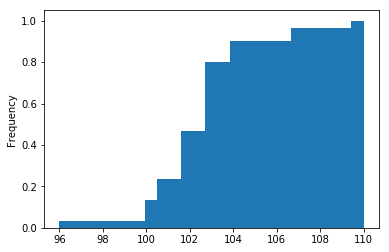

In [108]:
#Obtenemos la CDF
august_2011_high.plot(kind = 'hist',  normed = True, cumulative = True, bins = 25)
plt.show()

Como podemos ver la probabilidad de obtener una temperatura por debajo de 96, es bastante improbable por lo que la probabilidad de obtener una temperatura por encima del máximo de agosto de 2010 es prácticamente del 100%.